> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

> There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
> *** Quistion 1*** Which genres are most popular from year to year?

> *** Quistion 2*** Is there a correlation between budget and revenue?

> *** Quistion 3*** What is the highest revenue movie?

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Here we check for duplicated rows

In [9]:
movies_df.duplicated().sum()

1

> 1 doublicated row can be dropped

In [10]:
movies_df.drop_duplicates(inplace=True)

> Now we drop unnecessary columns from our dataset

In [11]:
movies_df.drop(['imdb_id','cast','director','homepage','tagline','production_companies','keywords'], axis=1, inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [12]:
movies_df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

> Now we drop the null values

In [13]:
movies_df.dropna(inplace=True)
movies_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

> Now we check our data types and correct them if needed

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10865
Data columns (total 14 columns):
id                10839 non-null int64
popularity        10839 non-null float64
budget            10839 non-null int64
revenue           10839 non-null int64
original_title    10839 non-null object
overview          10839 non-null object
runtime           10839 non-null int64
genres            10839 non-null object
release_date      10839 non-null object
vote_count        10839 non-null int64
vote_average      10839 non-null float64
release_year      10839 non-null int64
budget_adj        10839 non-null float64
revenue_adj       10839 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


> look like release_date datatype need to be changed

In [15]:
movies_df['release_date']=pd.to_datetime(movies_df['release_date'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10865
Data columns (total 14 columns):
id                10839 non-null int64
popularity        10839 non-null float64
budget            10839 non-null int64
revenue           10839 non-null int64
original_title    10839 non-null object
overview          10839 non-null object
runtime           10839 non-null int64
genres            10839 non-null object
release_date      10839 non-null datetime64[ns]
vote_count        10839 non-null int64
vote_average      10839 non-null float64
release_year      10839 non-null int64
budget_adj        10839 non-null float64
revenue_adj       10839 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.2+ MB


> Exploring the final dataset with visuals

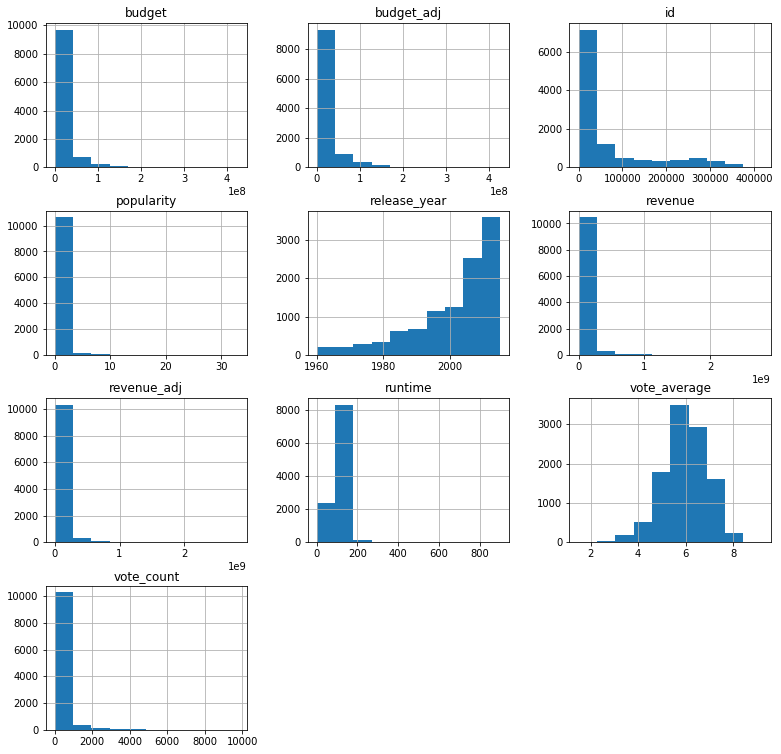

In [16]:
movies_df.hist(figsize=(13,13));

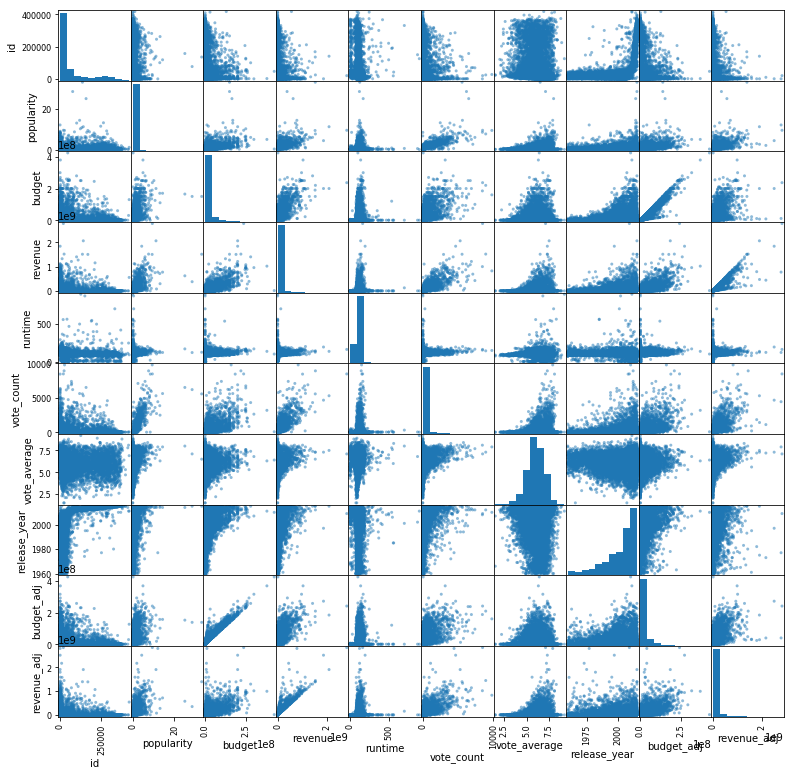

In [17]:
pd.plotting.scatter_matrix(movies_df, figsize=(13,13));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular from year to year?)

In [18]:
def extract_genres(movies_df):
    # This function takes the movies data frame and extract unique genres names from it
    # Genres in this data frame are saperated with "|"
    genres=[]
    for i in movies_df['genres'].str.split("|"):
        for j in range(len(i)):
            genres.append(i[j]) # this returns all repeated genres names
    genres_list = list(set(genres)) # here we take a list of unique genres names
    genre,count = [],[]
    for gen in genres_list: # this gives two lists 
        genre.append(gen) # one with genres names
        count.append(genres.count(gen)) # and the other with the counts of this genre
    genres_df = pd.DataFrame({'genre':genre,'count':count})
    return genres_df

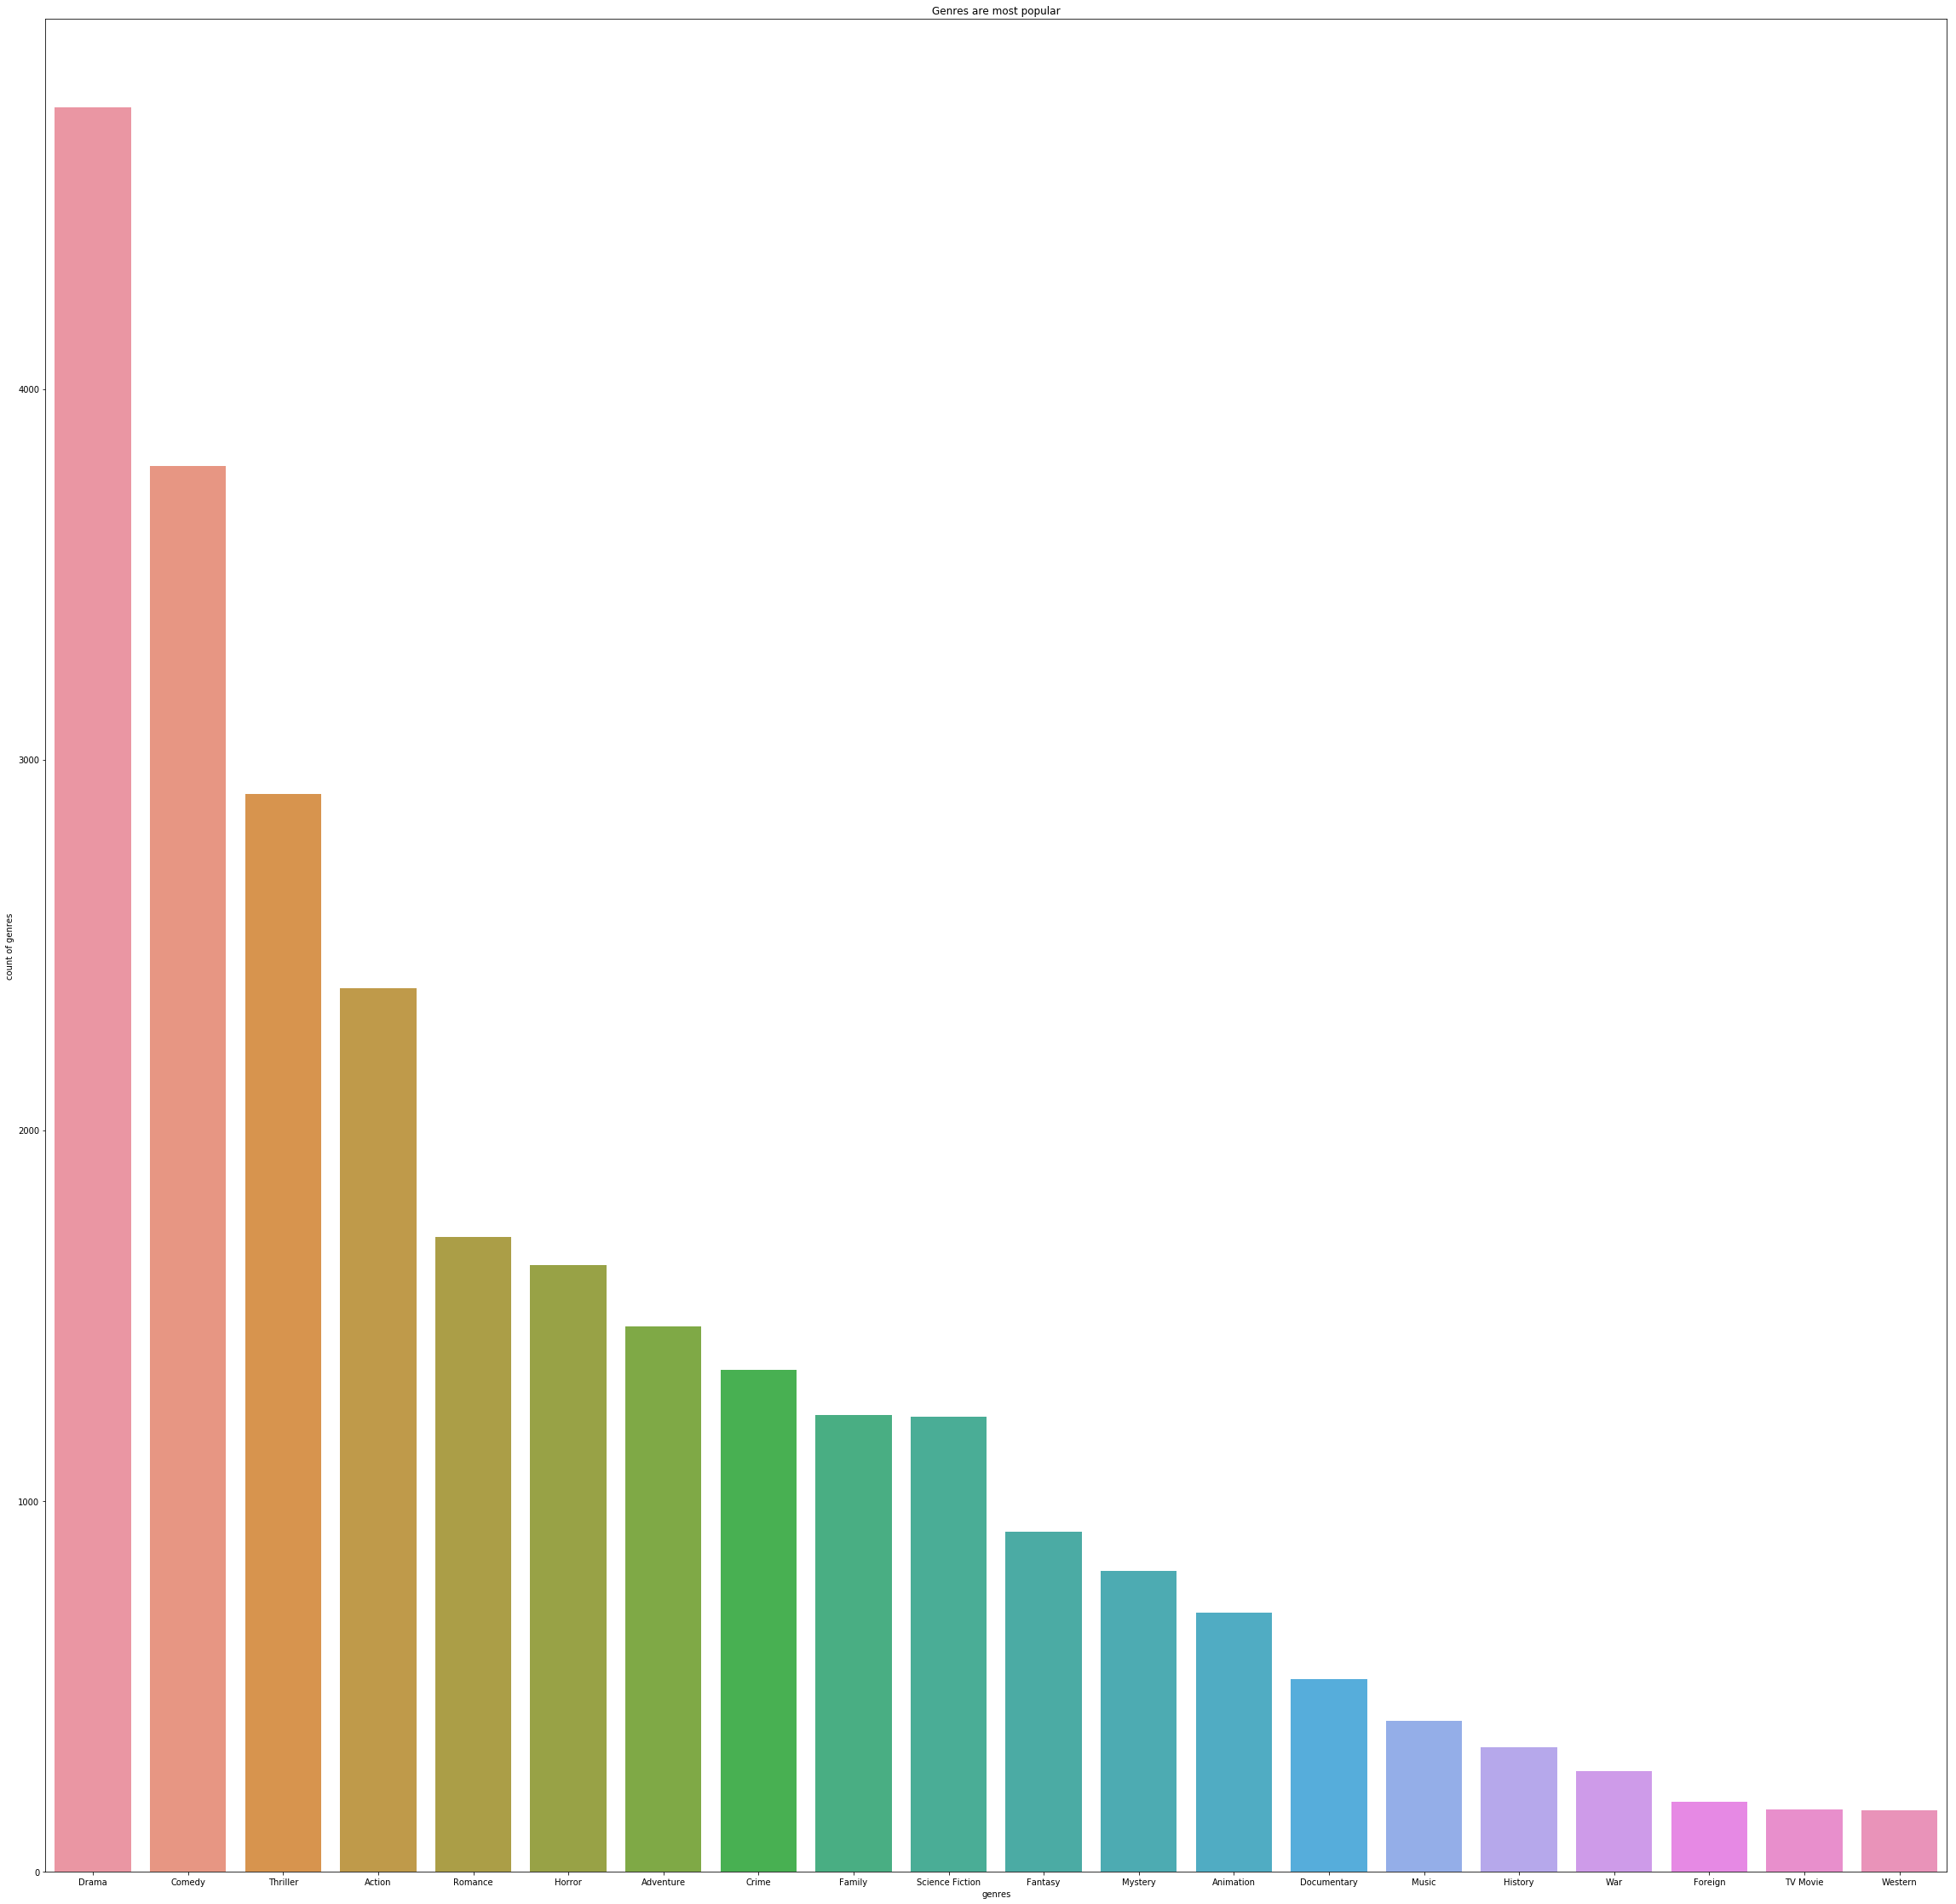

In [74]:
genres_df = extract_genres(movies_df)

plt.subplots(figsize=(40,40))
sns.barplot(x='genre',
            y='count', 
            data=genres_df, 
            order=genres_df.sort_values('count',ascending = False).genre)
plt.xlabel('genres')
plt.ylabel('count of genres')
plt.title('Genres are most popular');

>***Drama*** is the most genres trends more than ***4000*** times, then ***Comedy*** about ***4000*** times and then ***Thriller*** about ***3000*** times

### Research Question 2  (Is there a correlation between budget and revenue?)

Text(0,0.5,'revenue')

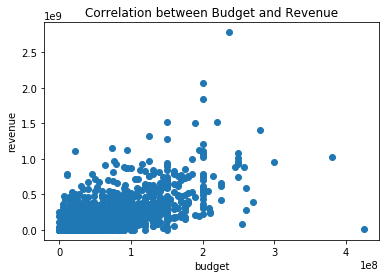

In [93]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(movies_df['budget'],movies_df['revenue']);
plt.title('Correlation between Budget and Revenue')
plt.xlabel('budget')
plt.ylabel('revenue')

>The plot above show ***there are a correlation skewed to right*** that means ***The higher the budget, the higher the revenue***

### Research Question 3  (What is the highest revenue movie?)

In [21]:
movies_df[movies_df['budget'] == 0]

,id,popularity,budget,revenue,original_title,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,0,22354572,Solace,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,0,45895,Beyond the Reach,A high-rolling corporate shark and his impover...,95,Thriller,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,0,0,Mythica: The Darkspore,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Greg is coasting through senior year of high s...,105,Comedy|Drama,2015-06-12,569,7.7,2015,0.0,0.000000e+00
88,301875,1.959765,0,2000000,Equals,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,2015-09-04,135,5.6,2015,0.0,1.839999e+06
92,370687,1.876037,0,0,Mythica: The Necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,2015-12-19,11,5.4,2015,0.0,0.000000e+00
95,258509,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,2015-12-17,278,5.7,2015,0.0,2.150550e+08
100,326359,1.724712,0,0,Frozen Fever,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,2015-03-09,475,7.0,2015,0.0,0.000000e+00
101,254302,1.661789,0,0,High-Rise,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,2015-09-26,161,5.4,2015,0.0,0.000000e+00


> There is movies with budget value of ***0*** and this is unacceptable as there cannot be amovie with 0 budget

> so we will replace these values with the mean vlaue

In [22]:
movies_df['budget'].replace(0,movies_df['budget'].mean(), inplace=True)
movies_df[movies_df['budget'] == 0]

,id,popularity,budget,revenue,original_title,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [23]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

Text(0.5,1,'Highest movies revenues')

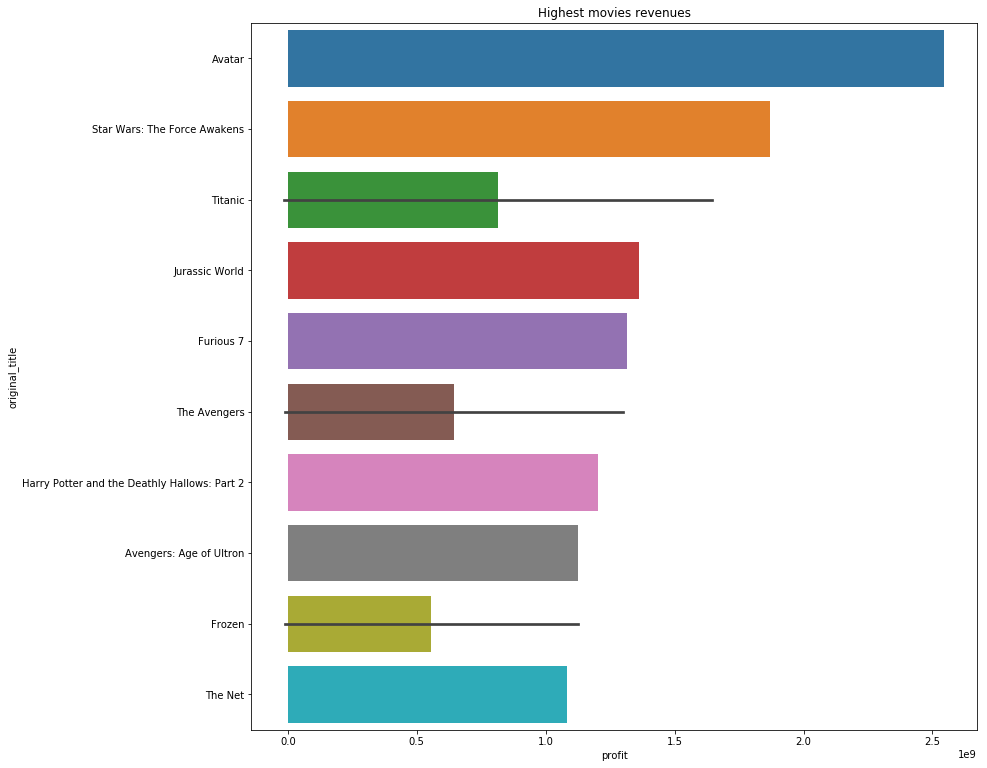

In [91]:
movies_df.sort_values(by=['profit'], ascending = False, axis = 0, inplace = True)


plt.subplots(figsize=(13,13))
sns.barplot(x='profit',
            y='original_title', 
            data=movies_df, 
            order=movies_df.head(10).sort_values('profit',ascending = False).original_title,
           orient = 'h')
plt.title('Highest movies revenues')



>The plot above give us a visulaize about which movies have large profit:

>***Avatar*** then ***Star Wars The Force Awakens*** and then ***Titanic***

<a id='conclusions'></a>
## Conclusions
> ***First*** i explored the data, cleand the data by dropping unnecessary columns and deal with missing values and dublicates and we explored the data with a varity of visuals

> After that i made an analuzayion about generas and what genras are most popular

> Then ianalyzed the correlation between budget and revenue and we found a positive correlation between them

> At last we calculated the revenue of each movie and ploted the top 10 movies in revenue


### Limitations
> in Budget column there are many '0' values and this not acceptable because every movie must have a budget, So we can replace it with the mean vlue of Budget all the specific years and this may affected un accurate insights

> Drop null value will affected on insights

## Submitting your Project 

> The most genres trends cross the year is Drama, Comedy and Thriller.

> The correlation between budget and revenue skewed to right that means The higher the budget, the higher the revenue

> The highest movies revenue is 'Avatar' then 'Star Wars: The Force Awakens'


In [94]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0